#-[0]. {Optional} Load google drive for csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# %cd /content/drive/My Drive/Colab Notebooks/reto4
%cd /content/drive/My Drive/URJC/Cours/'Reconocimiento patrones'

!ls

/content/drive/My Drive/URJC/Cours/Reconocimiento patrones
'Cour 1'	     Datasets_4
'Cour 10 (21oct)'   'Guía de repaso (Respuestas).gdoc'
'cour 12 (28 oct)'   ml_map.png
'Cour 2'	     Model_28-11-16:39:06.sav
'cour 3 (30sept)'    notas-reco-patrones.pdf
'cour 4'	    '[Perso] de Guía de repaso (Respuestas).gdoc'
'cour 5 (4oct)'      Reto1_2021.pdf
'cour 6 (7oct)'      Reto2_2021.pdf
 Datasets


#-[1]. Load all images

In [2]:
from PIL import Image, ImageEnhance, ImageFilter
import os, os.path
from random import randint
import numpy as np

# 0-Aula 1-Cocina 2-Dormitorio 3-Oficina

imgs_predict = []
labels = []

# path_predict = "./dataset/test/"
path_predict = "./Datasets_4/test/"

for f in sorted(os.listdir(path_predict)):
    ext = os.path.splitext(f)[1]
    tmp = Image.open(os.path.join(path_predict,f))
    if np.array(tmp).shape[2] == 3:
      imgs_predict.append(tmp)
    else:
      print("There's a bad image ! -> " + str(f))

imgs_train = []
# path_train_aula = "./dataset/train/aula" # 0
# path_train_cocina = "./dataset/train/cocina" # 1
# path_train_dormitorio = "./dataset/train/dormitorio" # 2
# path_train_oficina = "./dataset/train/oficina" # 3

path_train_aula = "./Datasets_4/train/aula" # 0
path_train_cocina = "./Datasets_4/train/cocina" # 1
path_train_dormitorio = "./Datasets_4/train/dormitorio" # 2
path_train_oficina = "./Datasets_4/train/oficina" # 3

print("test : " + str(len(imgs_predict)))

for f in os.listdir(path_train_aula):
    ext = os.path.splitext(f)[1]
    tmp = Image.open(os.path.join(path_train_aula,f))
    if np.array(tmp).shape[2] == 3:
      imgs_train.append(tmp)
      labels.append(0)
    else:
      print("There's a bad image ! -> " + str(f))
print("aula : " + str(len(imgs_train)))

for f in os.listdir(path_train_cocina):
    ext = os.path.splitext(f)[1]
    tmp = Image.open(os.path.join(path_train_cocina,f))
    if np.array(tmp).shape[2] == 3:
      imgs_train.append(tmp)
      labels.append(1)
    else:
      print("There's a bad image ! -> " + str(f))
print("cocina : " + str(len(imgs_train)))

for f in os.listdir(path_train_dormitorio):
    ext = os.path.splitext(f)[1]
    tmp = Image.open(os.path.join(path_train_dormitorio,f))
    if np.array(tmp).shape[2] == 3:
      imgs_train.append(tmp)
      labels.append(2)
    else:
      print("There's a bad image ! -> " + str(f))
print("dormitorio : " + str(len(imgs_train)))

for f in os.listdir(path_train_oficina):
    ext = os.path.splitext(f)[1]
    tmp = Image.open(os.path.join(path_train_oficina,f))
    if np.array(tmp).shape[2] == 3:
      imgs_train.append(tmp)
      labels.append(3)
    else:
      print("There's a bad image ! -> " + str(f))
print("oficina : " + str(len(imgs_train)))

test : 400
aula : 400
cocina : 800
There's a bad image ! -> dormitorio220
There's a bad image ! -> dormitorio177
dormitorio : 1198
oficina : 1598


In [3]:
# Chechking if none of the image as a depth of 4

import numpy as np

a = 0

for img in imgs_train:
  if np.array(img).shape[2] != 3:
    print(np.array(img).shape[2])
    print(str(a - 800))
  a += 1


for img in imgs_predict:
  if np.array(img).shape[2] != 3:
    print(np.array(img).shape[2])

#-[2]. Get images smallest size and biggest

In [4]:
biggest_size_x = 0
biggest_size_y = 0
smallest_size_x = 10000
smallest_size_y = 10000

for img in imgs_train:
  if img.size[0] > biggest_size_x:
    biggest_size_x = img.size[0]
  if img.size[1] > biggest_size_y:
    biggest_size_y = img.size[1]
  if img.size[0] < smallest_size_x:
    smallest_size_x = img.size[0]
  if img.size[1] < smallest_size_y:
    smallest_size_y = img.size[1]

print("Biggest size x : " + str(biggest_size_x))
print("Biggest size y : " + str(biggest_size_y))
print("Smallest size x : " + str(smallest_size_x))
print("Smallest size y : " + str(smallest_size_y))

Biggest size x : 240
Biggest size y : 150
Smallest size x : 72
Smallest size y : 72


#-[3]. Resizing all images to 150 x 150 x 3



In [5]:
# Resizing train set

size = 150, 150
good_size = 0
iter = 0

for img in imgs_train:
  if img.size[0] == size[0] and img.size[1] == size[1]:
    good_size += 1
  else :
    try:
      imgs_train[iter] = img.resize((size[0],size[1]), Image.ANTIALIAS)
    except IOError:
      print("cannot create thumbnail for '%s'" % infile)
  iter += 1

print("Good size images : " + str(good_size))


Good size images : 1512


In [6]:
# Resizing predict set

size = 150, 150
good_size = 0
iter = 0

for img in imgs_predict:
  if img.size[0] == size[0] and img.size[1] == size[1]:
    good_size += 1
  else :
    try:
      imgs_predict[iter] = img.resize((size[0],size[1]), Image.ANTIALIAS)
    except IOError:
      print("cannot create thumbnail for '%s'" % infile)
  iter += 1

print("Good size images : " + str(good_size))

Good size images : 372


#-[4]. Checking if all images are 150 x 150 x3

Train

In [7]:
# Checking if all images are 150 x 150 (TRAIN)

size = 150, 150
good_size = 0

for img in imgs_train:
  if img.size[0] == size[0] and img.size[1] == size[1]:
    good_size += 1
  else :
    print(img.size)

print("Good size images : " + str(good_size))

Good size images : 1598


Test (predict)

In [8]:
# Checking if all images are 150 x 150 (PREDICT)

size = 150, 150
good_size = 0

for img in imgs_predict:
  if img.size[0] == size[0] and img.size[1] == size[1]:
    good_size += 1
  else :
    print(img.size)

print("Good size images : " + str(good_size))

Good size images : 400


#-[5]. Data augmentation with flip, blur, zoom

In [9]:
def generate_image(image):

  if randint(0, 1) == 0:
    factor = randint(10, 13)
    factor = float(factor) / 10
    image = image.filter(ImageFilter.GaussianBlur(factor))

  if randint(0, 1) == 0:
	  image = image.transpose(method=Image.FLIP_LEFT_RIGHT)
 
  if randint(0, 1) == 0:
    factor = randint(5, 15)
    factor = float(factor) / 10
    image = ImageEnhance.Contrast(image).enhance(factor)

  if randint(0, 1) == 0:
    factor = randint(5, 10)
    factor = float(factor) / 10

    image = ImageEnhance.Brightness(image).enhance(factor)

  return image

In [10]:
imgs_train_copy = imgs_train.copy()
number_of_generations = 10
iter = 0

for img in imgs_train_copy:
  for _ in range(number_of_generations):
    imgs_train.append(generate_image(img))
    labels.append(labels[iter])
  iter += 1

print("Total of images in train : " + str(len(imgs_train)))

Total of images in train : 17578


#-[6]. Checking data augmentation

2


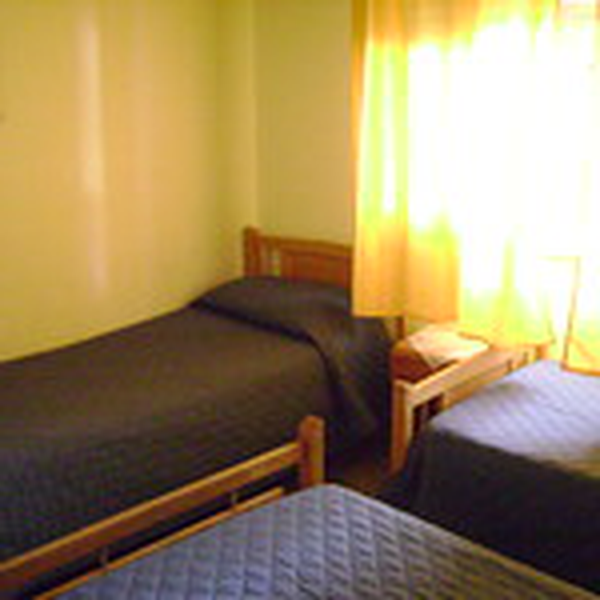

2


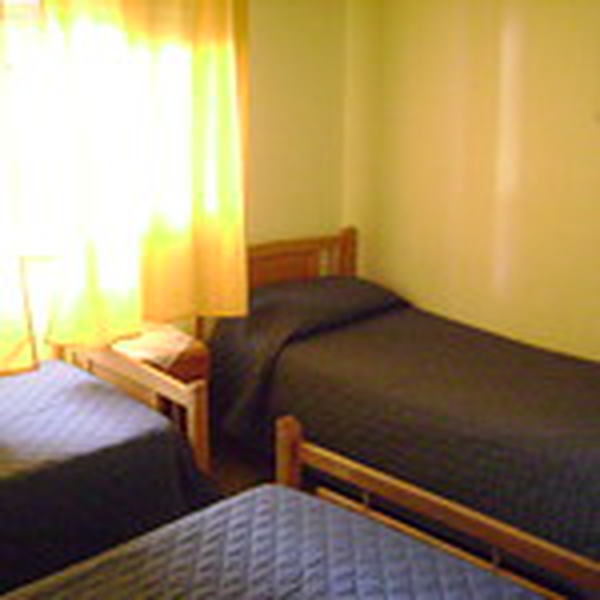

2


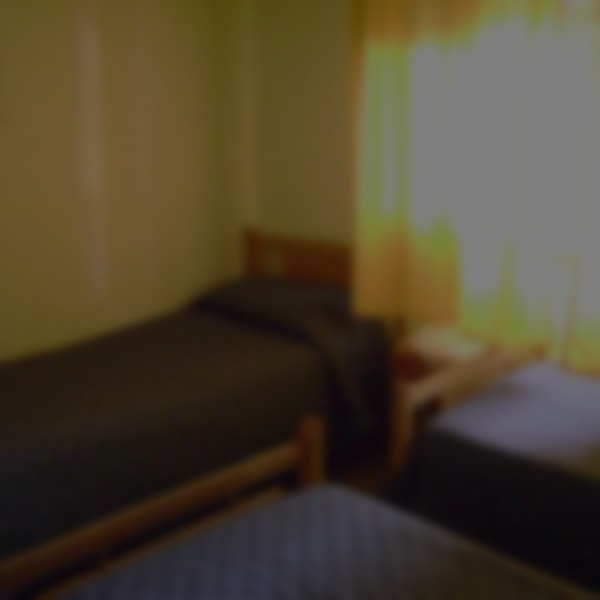

2


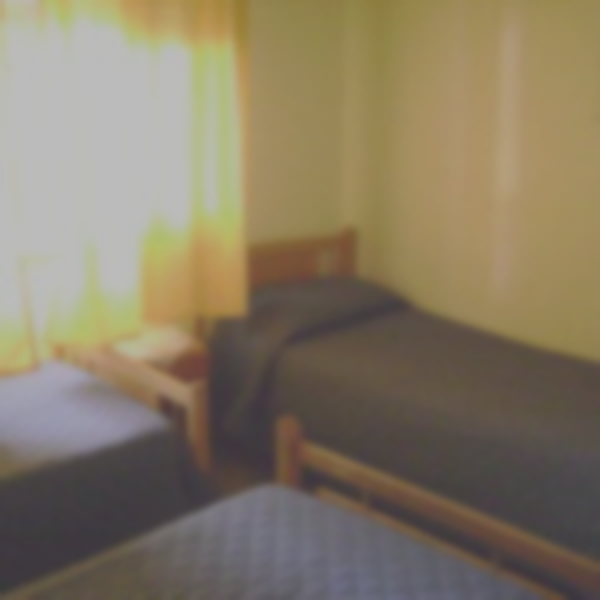

2


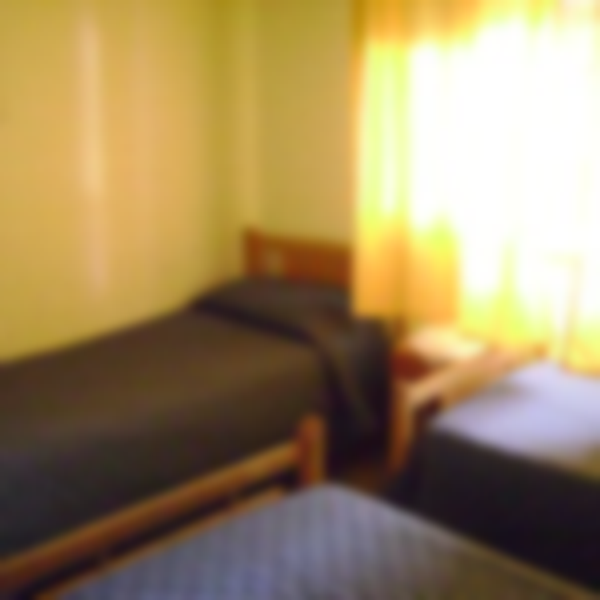

2


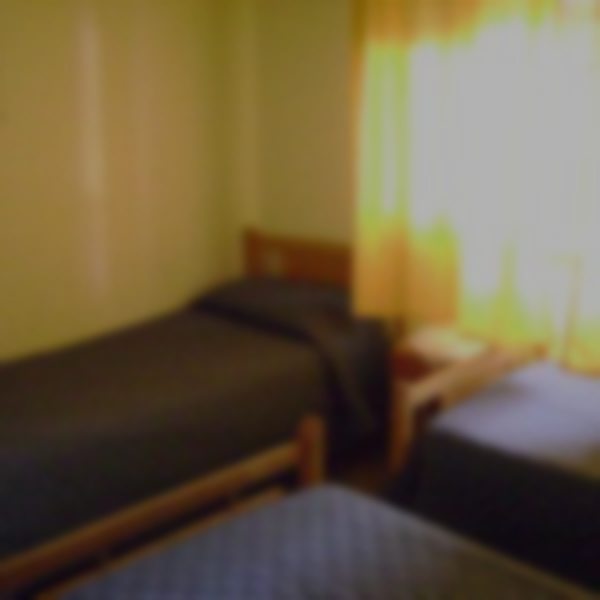

In [11]:
# 0-Aula 1-Cocina 2-Dormitorio 3-Oficina

print(labels[12000])
display(imgs_train[12000].resize((600,600), Image.ANTIALIAS))

print(labels[12001])
display(imgs_train[12001].resize((600,600), Image.ANTIALIAS))

print(labels[12002])
display(imgs_train[12002].resize((600,600), Image.ANTIALIAS))

print(labels[12003])
display(imgs_train[12003].resize((600,600), Image.ANTIALIAS))

print(labels[12004])
display(imgs_train[12004].resize((600,600), Image.ANTIALIAS))

print(labels[12005])
display(imgs_train[12005].resize((600,600), Image.ANTIALIAS))



#-[7]. Shuffle train set

In [12]:
import random

tmp = list(zip(imgs_train, labels))

random.shuffle(tmp)

imgs_train, labels = zip(*tmp)

#-[8]. Checking shuffle

1


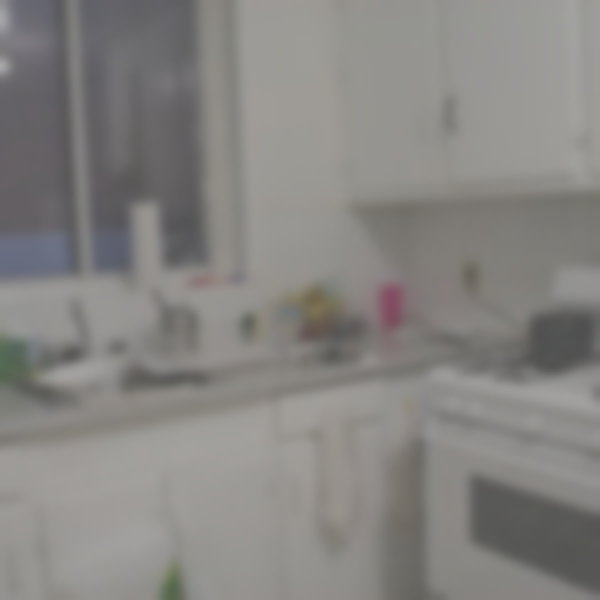

1


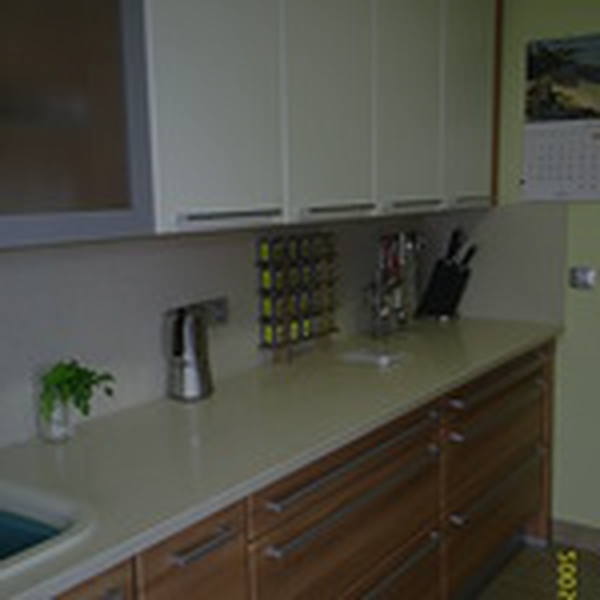

2


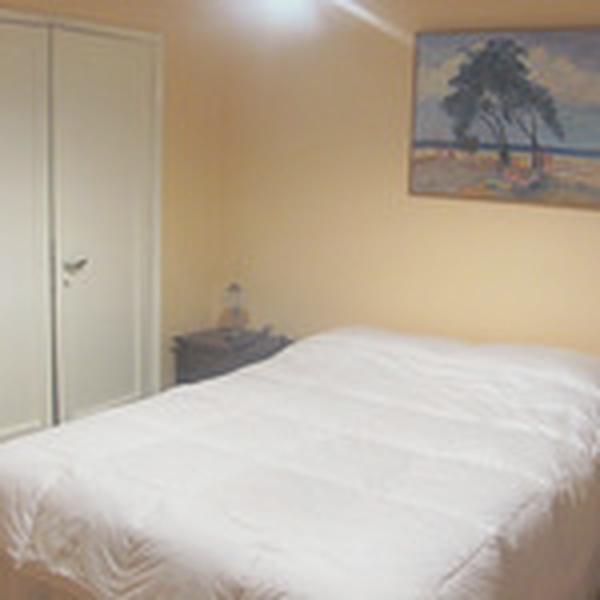

3


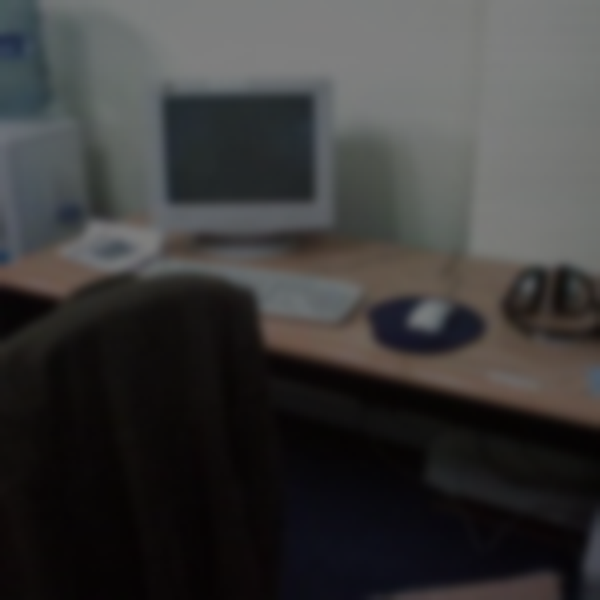

3


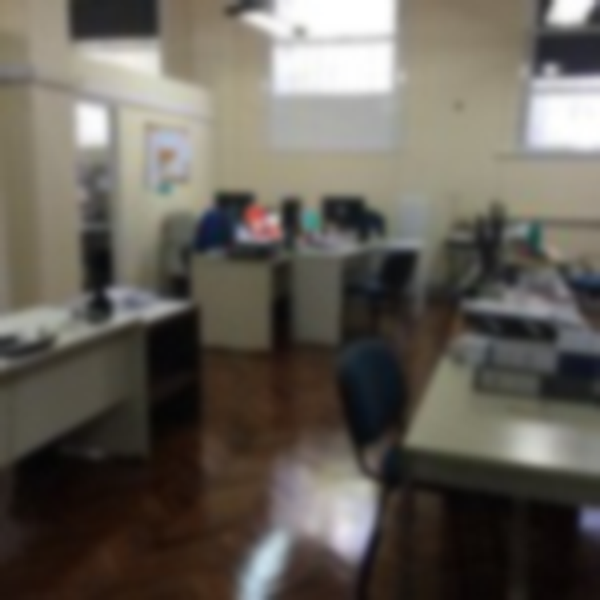

In [13]:
# 0-Aula 1-Cocina 2-Dormitorio 3-Oficina

for _ in range(5):
  random_image = randint(0, len(imgs_train))
  print(labels[random_image])
  display(imgs_train[random_image].resize((600,600), Image.ANTIALIAS))

#-[9]. Split data

In [14]:
# imgs_train labels (all dataset)

testsize = 0.2
all_test = []
all_train = []

data = list(zip(imgs_train, labels))
total_test = len(data)*testsize

for i in range(len(data)):
  if len(all_test) <= total_test:
    all_test.append(data[i])
  else:
    all_train.append(data[i])

im_train, labels_train = zip(*all_train)
im_test, labels_test = zip(*all_test)

print(len(im_train))
print(len(im_test))
print(len(labels_train))
print(len(labels_test))

14062
3516
14062
3516


1


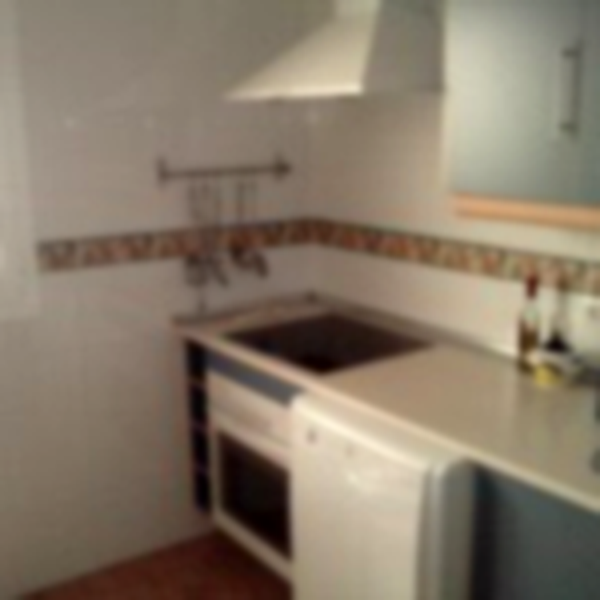

2


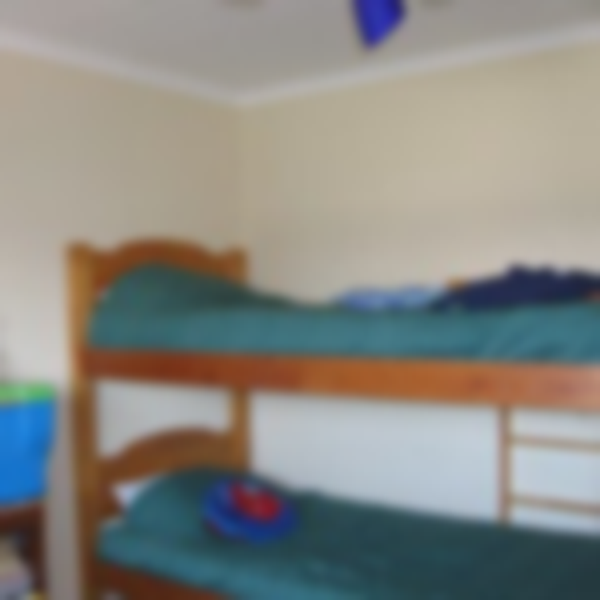

2


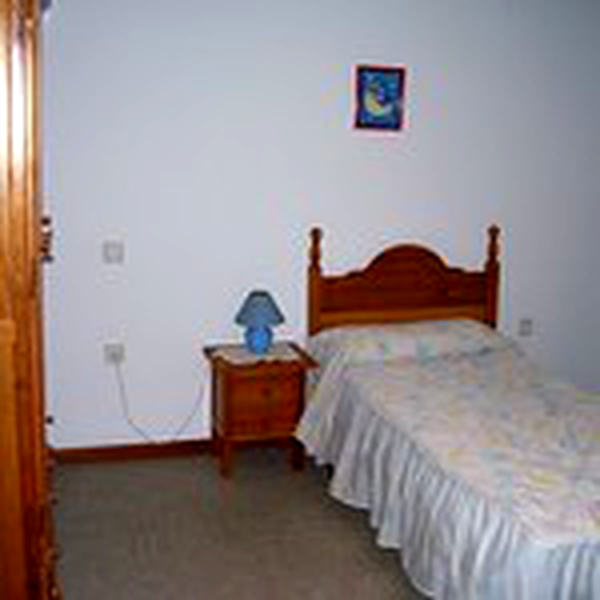

2


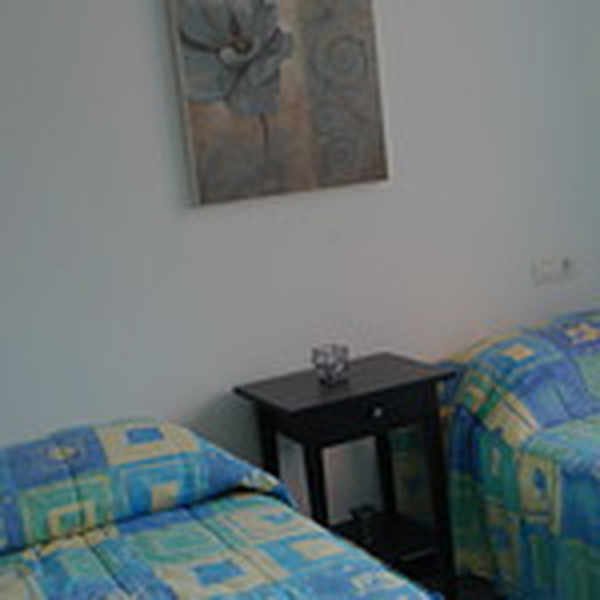

0


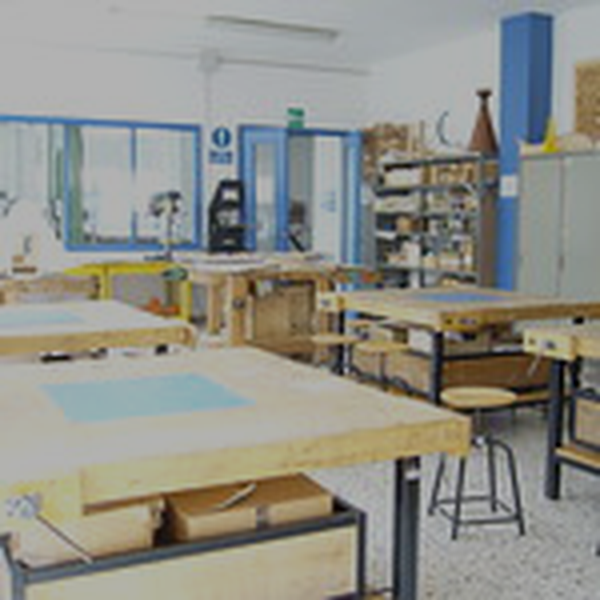

In [15]:
# 0-Aula 1-Cocina 2-Dormitorio 3-Oficina

for _ in range(5):
  random_image = randint(0, len(im_train))
  print(labels_train[random_image])
  display(im_train[random_image].resize((600,600), Image.ANTIALIAS))

#-[10]. Convert list of PIL images to lists of np array

In [16]:
# Convert labels list to np array
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)

np_im_train = []
np_im_test = []
np_im_predict = []

for img in im_train:
  np_im_train.append(np.array(img))
np_im_train = np.array(np_im_train)

for img in im_test:
  np_im_test.append(np.array(img))
np_im_test = np.array(np_im_test)

for img in imgs_predict:
  np_im_predict.append(np.array(img))
np_im_predict = np.array(np_im_predict)

print(np_im_predict.shape)
print(np_im_train.shape)
print(np_im_test.shape)
print(len(labels_train))
print(len(labels_test))

(400, 150, 150, 3)
(14062, 150, 150, 3)
(3516, 150, 150, 3)
14062
3516


#-[11]. Clear variables

In [18]:
del imgs_predict, labels, path_predict, tmp, ext, imgs_train, path_train_aula, path_train_cocina, path_train_dormitorio, path_train_oficina, a, biggest_size_x, biggest_size_y, smallest_size_x, smallest_size_y, size, good_size, iter, imgs_train_copy, number_of_generations, random_image, testsize, all_test, all_train, data, total_test, im_train, im_test

#-[12]. Cheching all values

In [19]:
print("Size of Prediction Numpy Array : " + str(np_im_predict.shape))
print("\nSize of Train Numpy Array : " + str(np_im_train.shape))
print("Size of Label Train Numpy Array : " + str(len(labels_train)))
print("\nSize of Test Numpy Array : " + str(np_im_test.shape))
print("Size of Label Test Numpy Array : " + str(len(labels_test)))


Size of Prediction Numpy Array : (400, 150, 150, 3)

Size of Train Numpy Array : (14062, 150, 150, 3)
Size of Label Train Numpy Array : 14062

Size of Test Numpy Array : (3516, 150, 150, 3)
Size of Label Test Numpy Array : 3516


#-[13]. Convert labels to One Hot encoding.

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
integer_encoded_train = LabelEncoder().fit_transform(labels_train)

# integer encode
integer_encoded_test = LabelEncoder().fit_transform(labels_test)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded_train.reshape(len(integer_encoded_train), 1)
labels_train_OH = onehot_encoder.fit_transform(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded_test.reshape(len(integer_encoded_test), 1)
labels_test_OH = onehot_encoder.fit_transform(integer_encoded)

del integer_encoded_train, integer_encoded_test, onehot_encoder, integer_encoded


#-[14]. Declare model and train.

In [21]:
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Activation, Add, Conv2D, MaxPooling2D, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from matplotlib import pyplot as plt

In [22]:
width = 150
height= 150
depth = 3
X_shape = [width,height,depth]

num_classes = 4
N_epochs = 50
batch_size = 32

In [23]:
np_im_train = np_im_train.astype('float32') / 255.
np_im_test = np_im_test.astype('float32') / 255.

In [24]:
# create Modelcheckpoint to save best model during the training.
#filepath="models/weights-improvement-{epoch:02d}-{val_loss:.2f}.h5"

import time
timestr = time.strftime("%Y%m%d_%H%M%S")
filepath = "models/" + timestr + '/best_model.h5'
print(filepath)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='min')

# create EarlyStopping to stop training when is not improving.
early = EarlyStopping(monitor="val_loss", min_delta=0, patience=10, 
                      verbose=1, mode="min", baseline=None, restore_best_weights=False)

callbacks_list = [checkpoint, early]

models/20211213_192209/best_model.h5


In [25]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=X_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 activation (Activation)     (None, 146, 146, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 71, 71, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                    

In [26]:
#history = model.fit(np_im_train, labels_train_OH, epochs=N_epochs, batch_size=batch_size, validation_split=0.1 ,callbacks=callbacks_list)
history = model.fit(np_im_train, labels_train_OH, epochs=N_epochs, batch_size=batch_size, validation_data=(np_im_test, labels_test_OH) ,callbacks=callbacks_list)

Epoch 1/50
440/440 [==============================] - ETA: 0s - loss: 1.2123 - accuracy: 0.4041
Epoch 00001: val_loss improved from inf to 0.97960, saving model to models/20211213_192209/best_model.h5
440/440 [==============================] - 35s 55ms/step - loss: 1.2123 - accuracy: 0.4041 - val_loss: 0.9796 - val_accuracy: 0.5668
Epoch 2/50
440/440 [==============================] - ETA: 0s - loss: 0.9157 - accuracy: 0.5914
Epoch 00002: val_loss improved from 0.97960 to 0.70997, saving model to models/20211213_192209/best_model.h5
440/440 [==============================] - 22s 49ms/step - loss: 0.9157 - accuracy: 0.5914 - val_loss: 0.7100 - val_accuracy: 0.6988
Epoch 3/50
439/440 [============================>.] - ETA: 0s - loss: 0.7072 - accuracy: 0.7020
Epoch 00003: val_loss improved from 0.70997 to 0.46615, saving model to models/20211213_192209/best_model.h5
440/440 [==============================] - 22s 50ms/step - loss: 0.7071 - accuracy: 0.7020 - val_loss: 0.4661 - val_accurac

#-[15]. Plot traning history.

Train and validation accuracy.
Train and validation loss.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


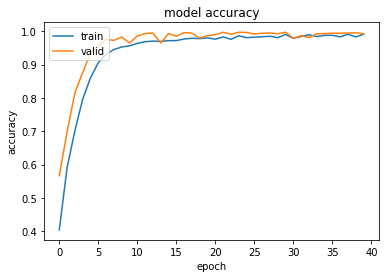

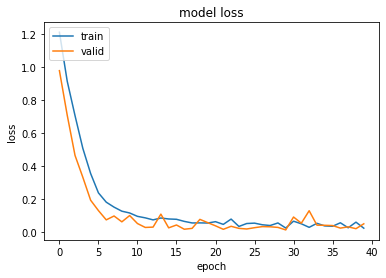

<Figure size 432x288 with 0 Axes>

In [27]:
path, f = os.path.split(filepath)
save_accuracy = path + "/plot_accuracy.png"
save_loss = path + "/plot_loss.png"

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
plt.savefig(save_accuracy)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
plt.savefig(save_loss)

#-[16]. Testing model. Use test and predict dataset.

In [28]:
# Usamos el nombre del ultimo archivo guardado que es el mejor modelo que se ha entrenado.
# Cargamos ese nuevo modelo y hacemos la evaluacion sobre los datos.

new_model = load_model(filepath)

#results = new_model.evaluate(np_im_test, labels_test_OH, batch_size=batch_size)

In [29]:
np_im_predict = np_im_predict.astype('float32') / 255.

predictions = new_model.predict(np_im_predict)
classes_results = np.argmax(predictions,axis=1)

print("predictions:", predictions)
print("predictions:", classes_results)

predictions: [[2.57872516e-32 1.00000000e+00 1.54744965e-21 2.38709951e-30]
 [7.31833143e-06 4.29492756e-25 4.56363636e-12 9.99992728e-01]
 [7.27937034e-19 3.04522956e-20 1.00000000e+00 5.60858730e-18]
 ...
 [1.57327944e-24 9.99996066e-01 3.98474640e-06 2.96751520e-18]
 [1.23076916e-01 1.53013091e-09 1.01567748e-05 8.76912951e-01]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]]
predictions: [1 3 2 0 1 1 1 2 3 1 3 2 0 2 2 3 0 3 0 2 0 0 3 1 1 3 0 3 1 1 2 3 0 2 1 2 3
 1 3 3 1 3 3 3 0 1 2 0 2 3 0 2 2 1 2 3 3 1 1 0 1 1 0 1 3 0 1 3 1 1 1 0 0 3
 3 1 3 2 2 0 3 0 1 1 1 2 3 2 2 1 0 2 2 0 0 0 2 1 1 2 3 1 2 1 1 3 0 1 0 0 3
 3 3 1 1 3 0 0 0 1 0 0 1 0 1 1 2 1 3 0 0 1 3 0 3 3 3 2 2 0 2 2 3 3 3 1 0 0
 2 3 3 1 2 3 1 2 2 2 3 1 1 1 3 3 0 1 2 1 2 2 3 2 1 2 2 3 3 1 1 0 0 3 3 1 2
 3 1 3 0 3 0 0 2 3 1 2 0 3 0 2 3 2 1 2 0 1 1 3 3 0 0 2 3 3 3 1 3 3 1 1 3 3
 3 0 3 1 3 0 0 1 2 1 0 0 1 0 0 0 1 1 0 3 3 1 1 2 3 1 3 0 0 0 0 0 0 2 3 3 1
 1 3 1 1 1 0 1 1 3 1 1 0 1 2 1 1 1 3 0 0 3 1 3 2 3 1 0 3 2 1 1 0 

#-[16]. Create .csv with prediction of predict data.

In [30]:
import os

path, f = os.path.split(filepath)
save_results = path + "/reto4_Ypred.csv"

csv_data = []

for i in classes_results:
  if i == 0:
    csv_data.append('aula')
  elif i==1:
    csv_data.append('cocina')
  elif i==2:
    csv_data.append('dormitorio')
  else:
    csv_data.append('oficina')

np.savetxt(save_results, csv_data, delimiter=",", fmt='%s')